In [1]:
import hhgen.plots as plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler

In [2]:
#best parameters: {'clip_weight': 40, 'learning_rate': 0.001, 'n_estimators': 500, 'subsample': 0.6, 
#'reg_lambda': 2, 'max_depth': 10}

features = ['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg']
features+=['leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta']
features+=['leadPho_pt','leadPho_eta','subleadPho_pt','subleadPho_eta']

scaler=RobustScaler()

CPU times: user 2min 21s, sys: 3.73 s, total: 2min 24s
Wall time: 18.1 s
Weighted least squares for true/pred plot:  6705.88
Weighted least squares for true/pred plot without category 0:  6662.29


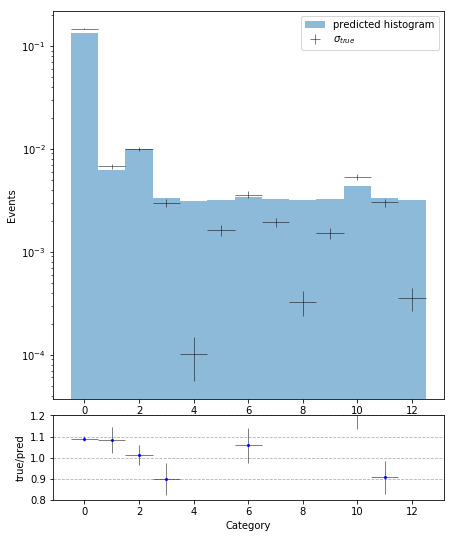

In [3]:
#node_SM
df=pd.read_hdf("node_SM.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 44s, sys: 2.7 s, total: 1min 47s
Wall time: 13.5 s
Weighted least squares for true/pred plot:  1927.11
Weighted least squares for true/pred plot without category 0:  1889.03


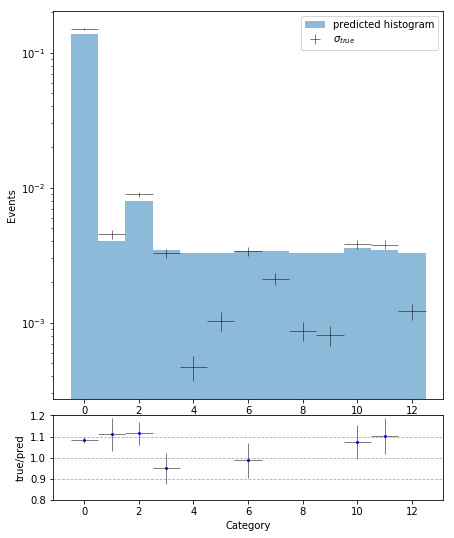

In [4]:
#node_box
df=pd.read_hdf("node_box.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 44s, sys: 2.27 s, total: 1min 46s
Wall time: 13.4 s
Weighted least squares for true/pred plot:  1390.07
Weighted least squares for true/pred plot without category 0:  1341.36


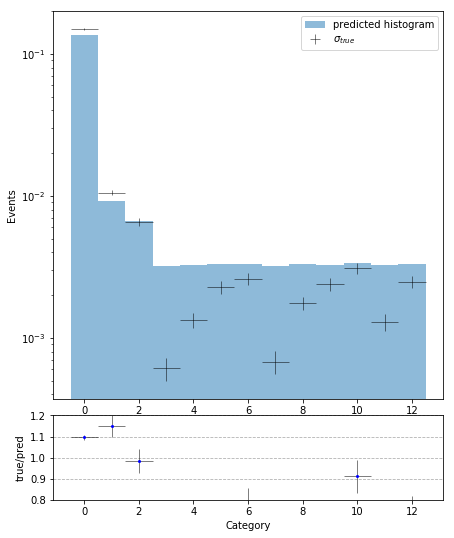

In [5]:
#node_2
df=pd.read_hdf("node_2.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 46s, sys: 2.21 s, total: 1min 48s
Wall time: 13.6 s
Weighted least squares for true/pred plot:  2757.25
Weighted least squares for true/pred plot without category 0:  2697.48


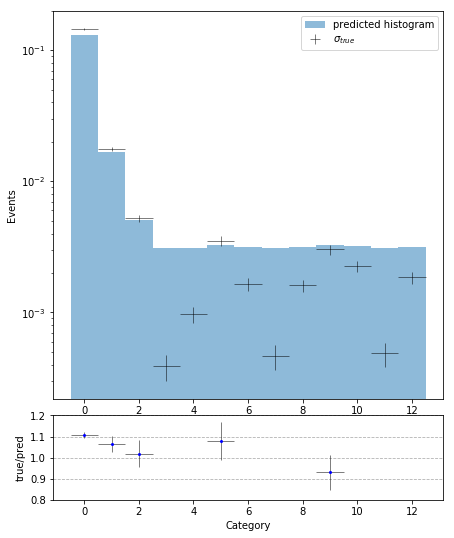

In [6]:
#node_3
df=pd.read_hdf("node_3.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 44s, sys: 3 s, total: 1min 47s
Wall time: 13.4 s
Weighted least squares for true/pred plot:  995.245
Weighted least squares for true/pred plot without category 0:  945.808


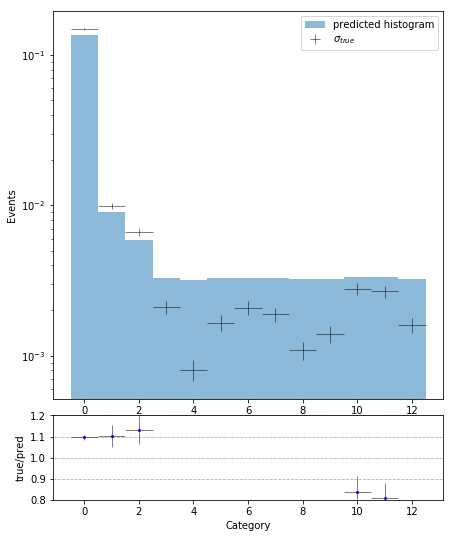

In [7]:
#node_4
df=pd.read_hdf("node_4.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 45s, sys: 2.78 s, total: 1min 48s
Wall time: 13.6 s
Weighted least squares for true/pred plot:  1774.22
Weighted least squares for true/pred plot without category 0:  1686.88


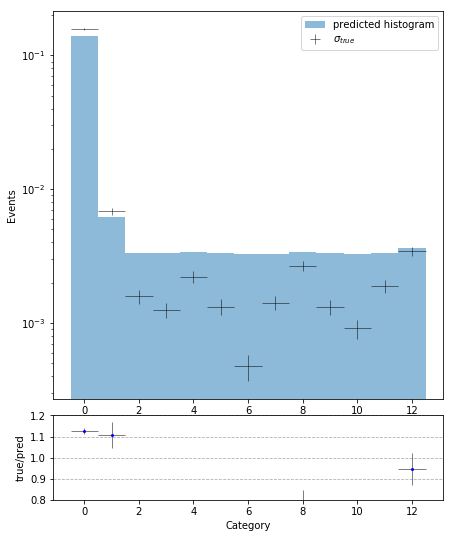

In [8]:
#node_5
df=pd.read_hdf("node_5.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 44s, sys: 2.87 s, total: 1min 47s
Wall time: 13.4 s
Weighted least squares for true/pred plot:  2854.21
Weighted least squares for true/pred plot without category 0:  2814.84


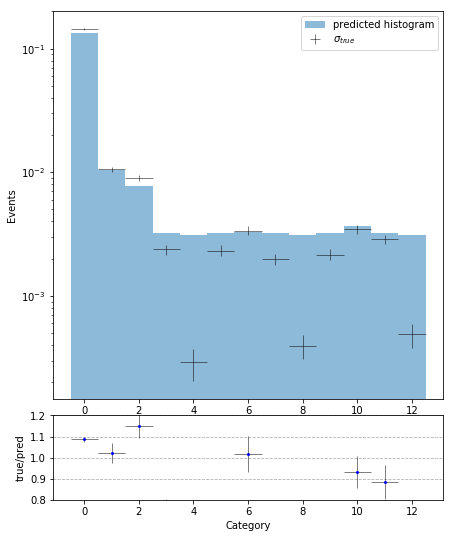

In [9]:
#node_6
df=pd.read_hdf("node_6.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 44s, sys: 2.41 s, total: 1min 46s
Wall time: 13.3 s
Weighted least squares for true/pred plot:  2020.61
Weighted least squares for true/pred plot without category 0:  1986.97


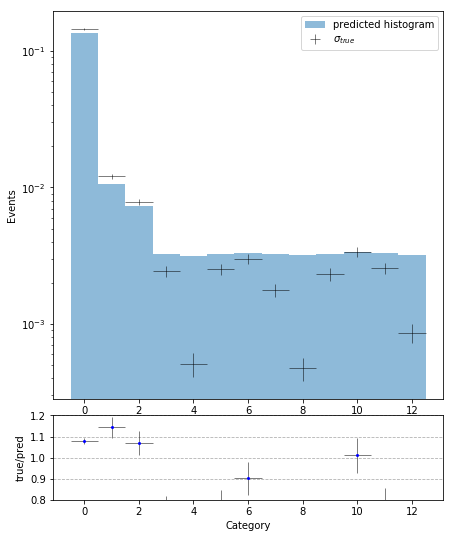

In [10]:
#node_7
df=pd.read_hdf("node_7.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 45s, sys: 1.95 s, total: 1min 47s
Wall time: 13.5 s
Weighted least squares for true/pred plot:  2453.17
Weighted least squares for true/pred plot without category 0:  2362.1


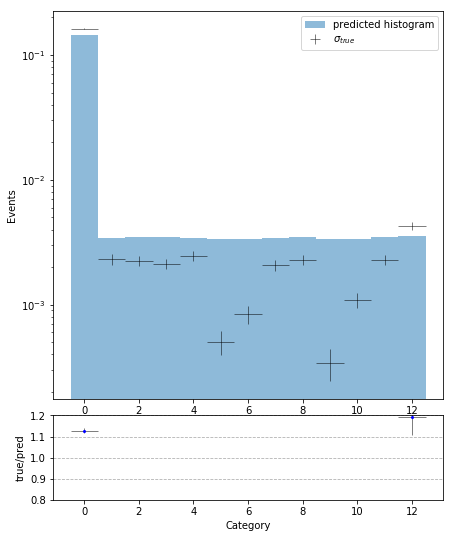

In [11]:
#node_8
df=pd.read_hdf("node_8.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 38s, sys: 2.09 s, total: 1min 41s
Wall time: 12.7 s
Weighted least squares for true/pred plot:  1041.92
Weighted least squares for true/pred plot without category 0:  996.793


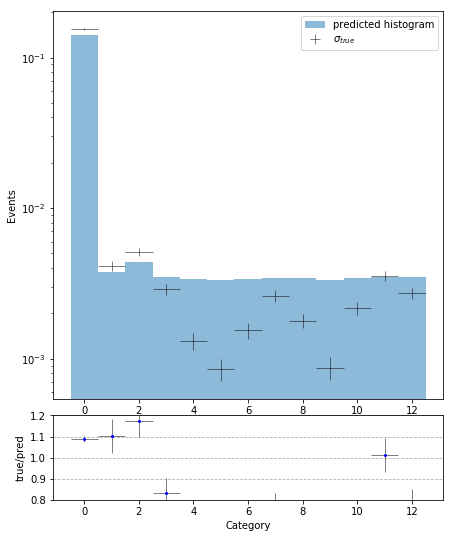

In [12]:
#node_9
df=pd.read_hdf("node_9.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 34s, sys: 2.52 s, total: 1min 37s
Wall time: 12.2 s
Weighted least squares for true/pred plot:  1108.88
Weighted least squares for true/pred plot without category 0:  1058.97


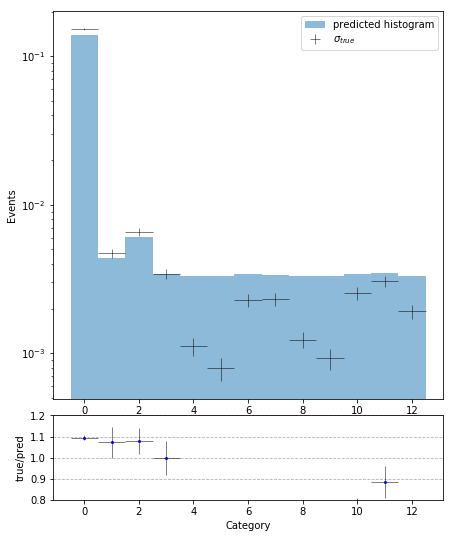

In [13]:
#node_10
df=pd.read_hdf("node_10.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 33s, sys: 2.13 s, total: 1min 35s
Wall time: 12 s
Weighted least squares for true/pred plot:  1195.09
Weighted least squares for true/pred plot without category 0:  1133.14


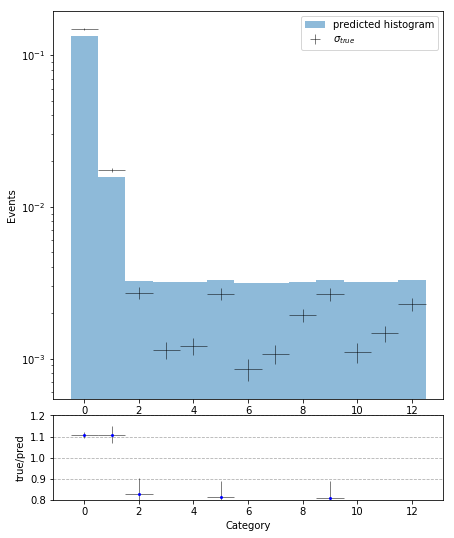

In [14]:
#node_11
df=pd.read_hdf("node_11.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 35s, sys: 2.41 s, total: 1min 37s
Wall time: 12.2 s
Weighted least squares for true/pred plot:  1707.66
Weighted least squares for true/pred plot without category 0:  1665.05


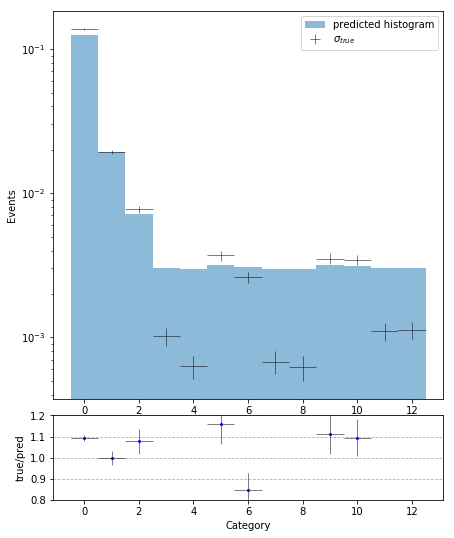

In [15]:
#node_12
df=pd.read_hdf("node_12.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 1min 35s, sys: 2.27 s, total: 1min 37s
Wall time: 12.2 s
Weighted least squares for true/pred plot:  12599.3
Weighted least squares for true/pred plot without category 0:  12556.0


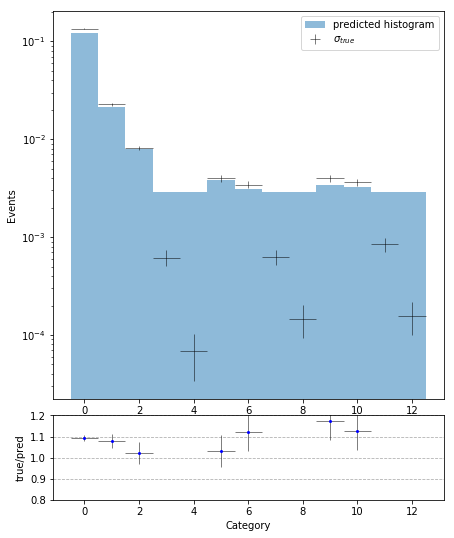

In [16]:
#node_13
df=pd.read_hdf("node_13.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,40)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=10, n_estimators=500, n_jobs=8, objective='multi:softmax', subsample=0.6,
                 reg_lambda=2, learning_rate=0.001)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)